In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout

In [6]:
#load prepared data
train_set=pd.read_csv('train_set_new.csv')
val_set=pd.read_csv('val_set_new.csv')
test_set=pd.read_csv('test_set_new.csv')

In [11]:
#set date as an index
train_set = train_set.set_index('Date')
val_set = val_set.set_index('Date')
test_set = test_set.set_index('Date')

print(train_set.shape, val_set.shape, test_set.shape)

train_set.head()

(359432, 17) (62138, 17) (115064, 17)


Store  Dept  Unemployment  IsHoliday  Type    Size  Temperature  \
Date                                                                          
2010-02-05      1     1         8.106          0     1  151315        42.31   
2010-02-12      1     1         8.106          1     1  151315        38.51   
2010-02-19      1     1         8.106          0     1  151315        39.93   
2010-02-26      1     1         8.106          0     1  151315        46.63   
2010-03-05      1     1         8.106          0     1  151315        46.50   

            Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
Date                                                                            
2010-02-05       2.572        0.0        0.0        0.0        0.0        0.0   
2010-02-12       2.548        0.0        0.0        0.0        0.0        0.0   
2010-02-19       2.514        0.0        0.0        0.0        0.0        0.0   
2010-02-26       2.561        0.0        0.0        0.0        0.0        0.0   
2010-03-05       2.625        0.0        0.0        0.0        0.0        0.0   

                   CPI  Week  Year  Weekly_Sales  
Date                                              
2010-02-05  211.096358     5  2010      24924.50  
2010-02-12  211.242170     6  2010      46039.49  
2010-02-19  211.289143     7  2010      41595.55  
2010-02-26  211.319643     8  2010      19403.54  
2010-03-05  211.350143     9  2010      21827.90

In [12]:

#the data only for store 1
train_1 = train_set[(train_set['Store']==1)]
val_1 = val_set[(val_set['Store']==1)]
test_1 = test_set[(test_set['Store']==1)]

#all stores have 99 departments
#but there are not all sales for every departmept in the table

#departments that we  have in the data for store 1
dept_set =set(val_1['Dept'].values)
print(dept_set)
print(len(dept_set))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 52, 54, 55, 56, 58, 59, 60, 67, 71, 72, 74, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}
74


(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 2, 64)             20736     
_________________________________________________________________
dropout (Dropout)            (None, 2, 64)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 143ms/step - loss: 0.08

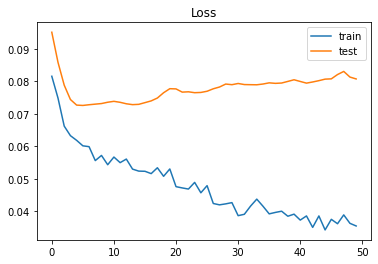

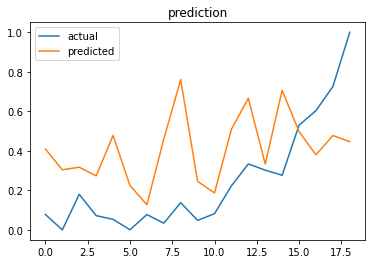

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 2, 64)             20736     
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 64)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 138ms/step - loss: 0.

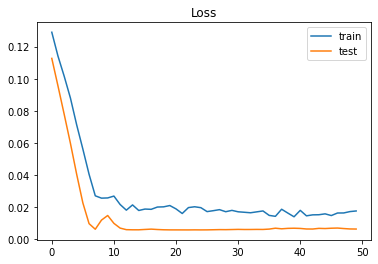

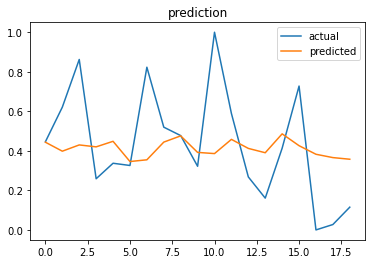

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 2, 64)             20736     
_________________________________________________________________
dropout_4 (Dropout)          (None, 2, 64)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 231ms/step - loss: 0.

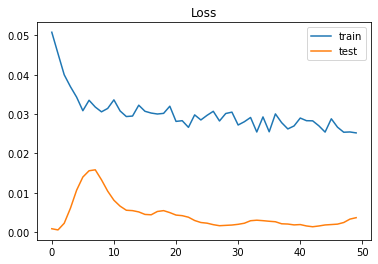

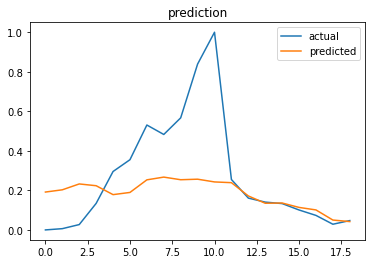

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 2, 64)             20736     
_________________________________________________________________
dropout_6 (Dropout)          (None, 2, 64)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 129ms/step - loss: 0.

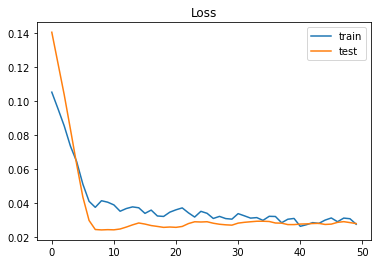

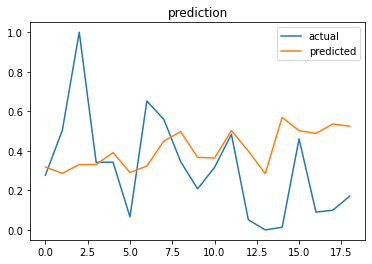

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 2, 64)             20736     
_________________________________________________________________
dropout_8 (Dropout)          (None, 2, 64)             0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 130ms/step - loss: 0.

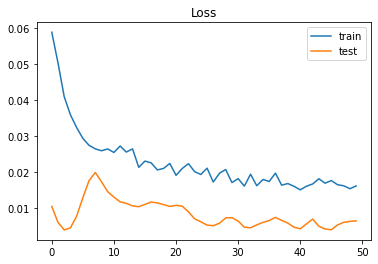

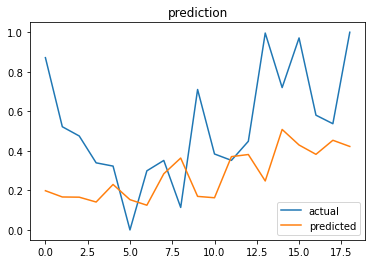

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_10 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 129ms/step - loss: 0.

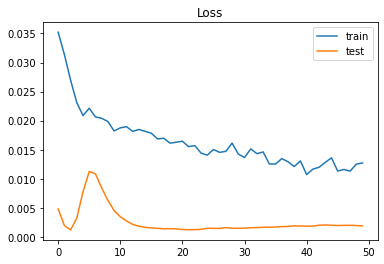

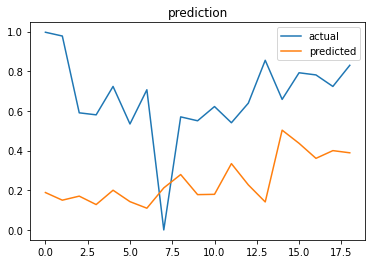

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_12 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_13 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 148ms/step - loss: 0.

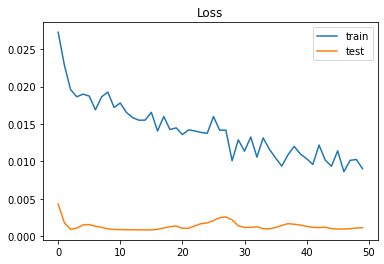

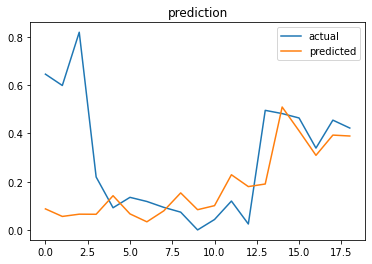

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_14 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_15 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 328ms/step - loss: 0.

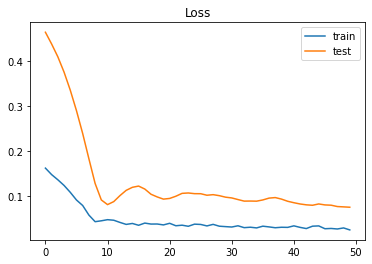

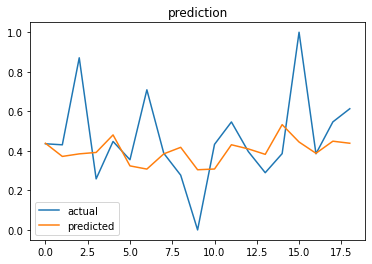

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_16 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_17 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 133ms/step - loss: 0.

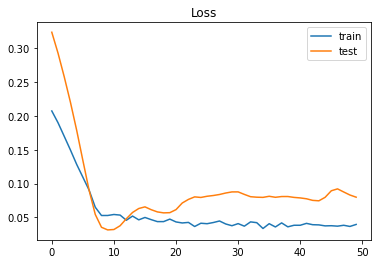

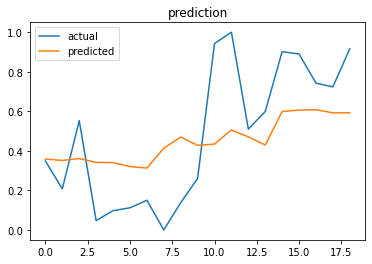

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_18 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_19 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 127ms/step - loss: 0.

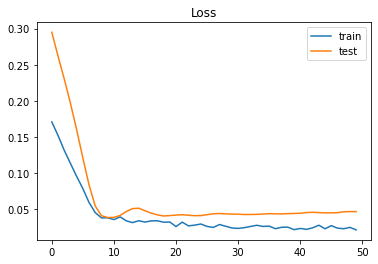

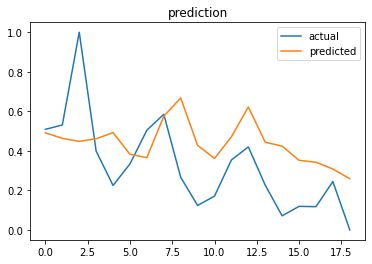

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_20 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_21 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 129ms/step - loss: 0

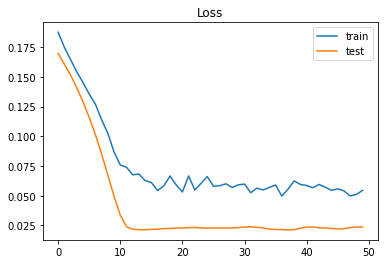

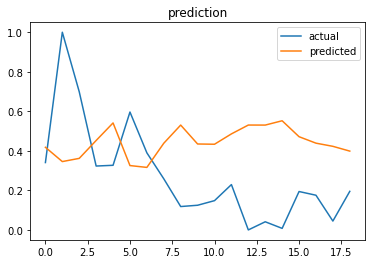

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_22 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_23 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 130ms/step - loss: 0

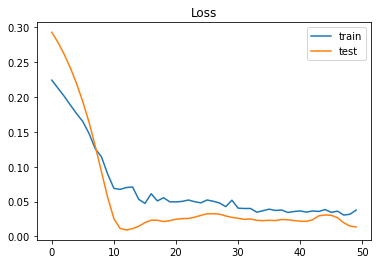

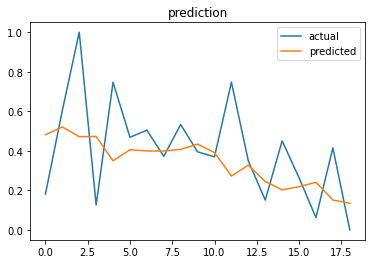

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_24 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_25 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 199ms/step - loss: 0

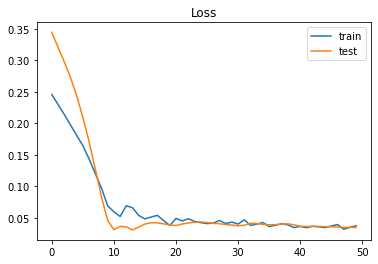

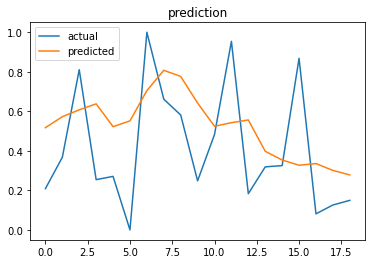

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_26 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_27 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 127ms/step - loss: 0

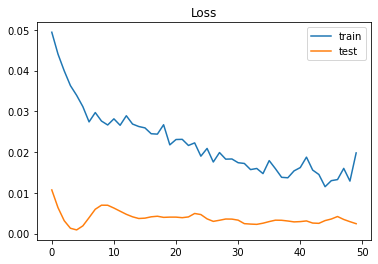

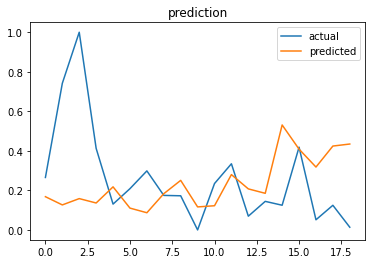

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_28 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_29 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 129ms/step - loss: 0

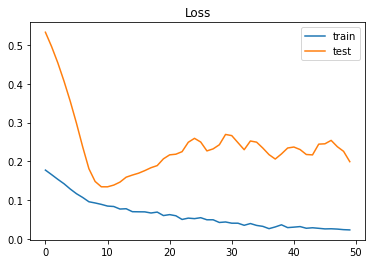

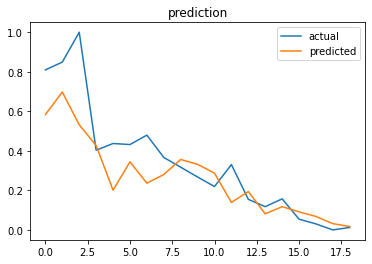

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_30 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_31 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 128ms/step - loss: 0

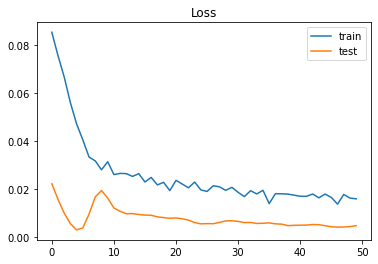

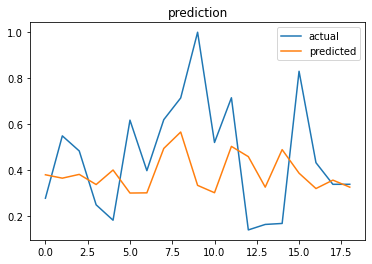

(98, 2, 16) (98, 1)
(11, 2, 16) (11, 1)
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_32 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_33 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_33 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
3/3 [==============================] - 1s 172ms/step - loss: 0.0

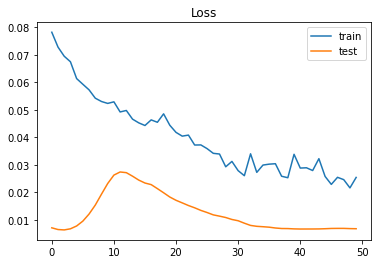

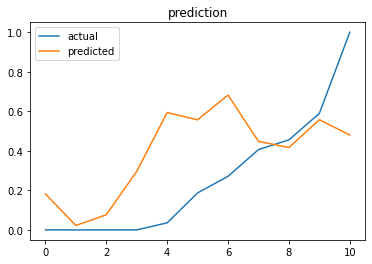

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_34 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_35 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_35 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 130ms/step - loss: 0

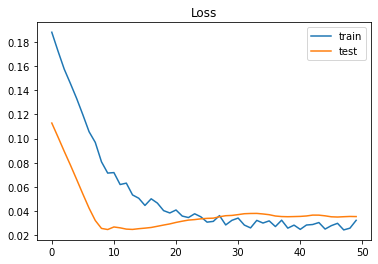

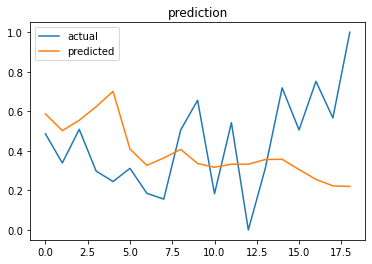

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_36 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_37 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_37 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 127ms/step - loss: 0

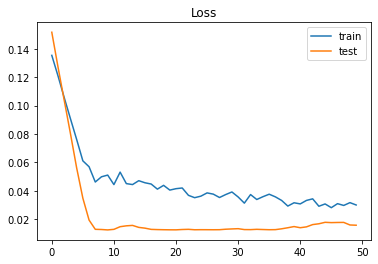

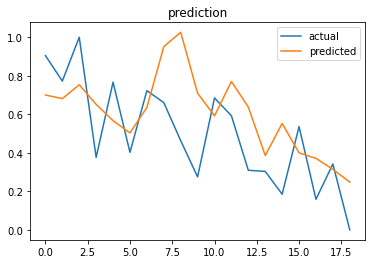

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_38 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_38 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_39 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_39 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 127ms/step - loss: 0

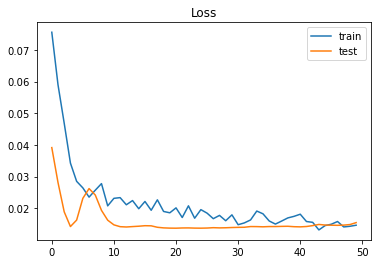

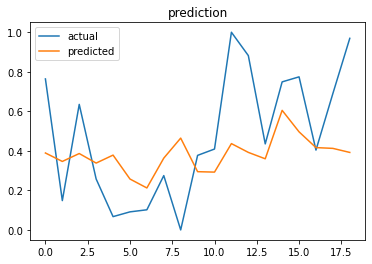

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_40 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_41 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_41 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 128ms/step - loss: 0

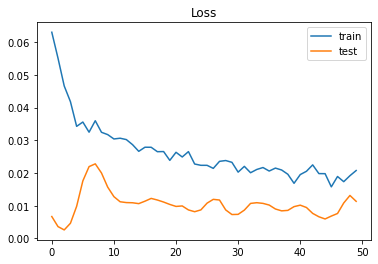

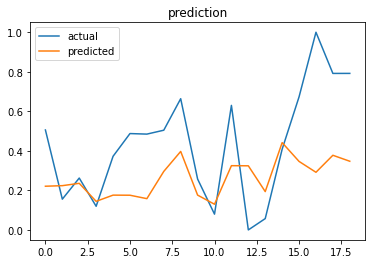

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_42 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_43 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_43 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 131ms/step - loss: 0

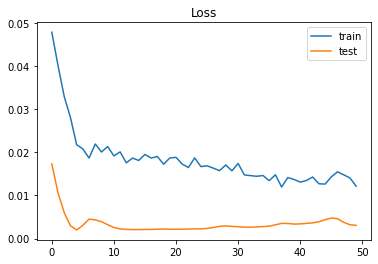

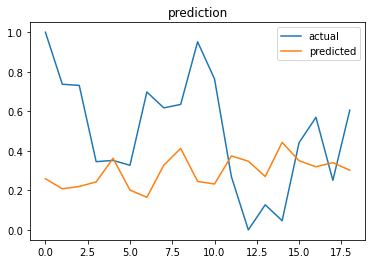

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_44 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_44 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_45 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_45 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 145ms/step - loss: 0

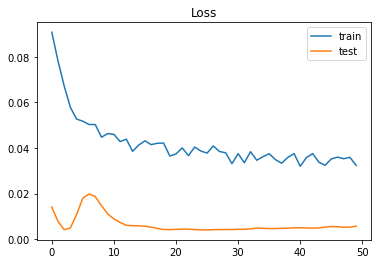

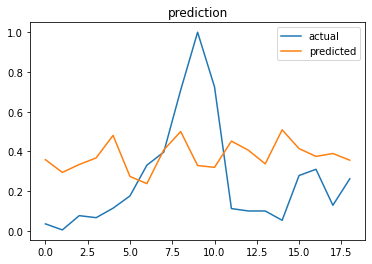

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_46 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_46 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_47 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_47 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 146ms/step - loss: 0

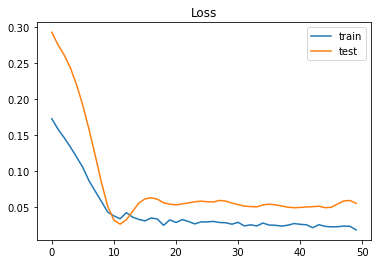

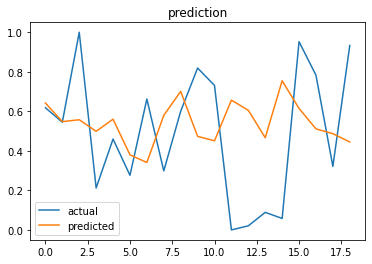

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_48 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_48 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_49 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_49 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 128ms/step - loss: 0

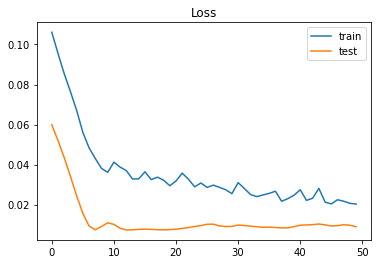

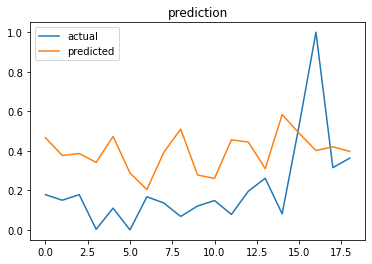

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_50 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_50 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_51 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_51 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 0s 116ms/step - loss: 0

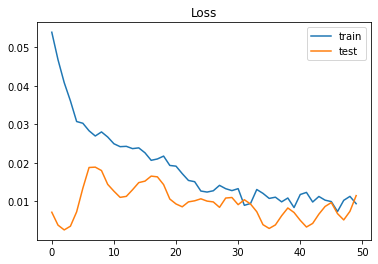

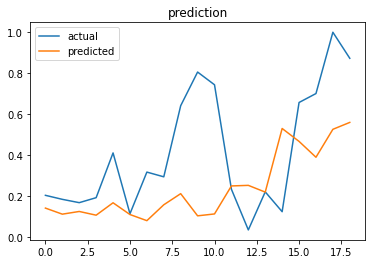

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_52 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_52 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_53 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_53 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 0s 117ms/step - loss: 0

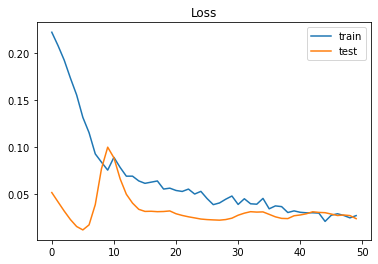

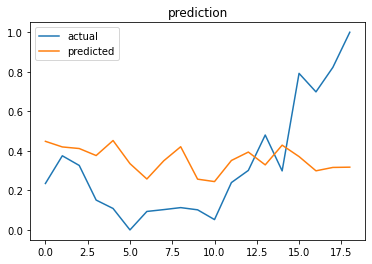

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_54 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_54 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_55 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_55 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 0s 121ms/step - loss: 0

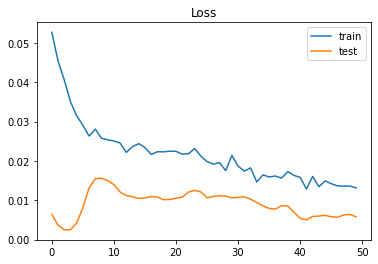

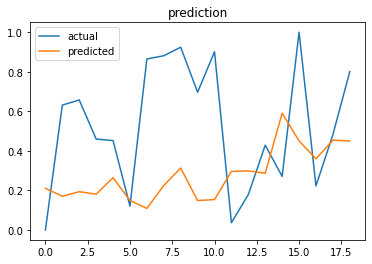

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_56 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_56 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_57 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_57 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 159ms/step - loss: 0

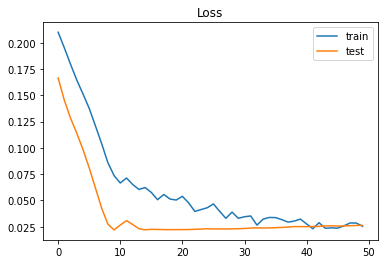

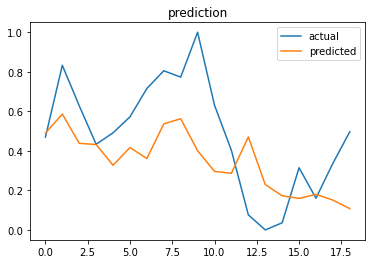

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_58 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_58 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_59 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_59 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 0s 121ms/step - loss: 0

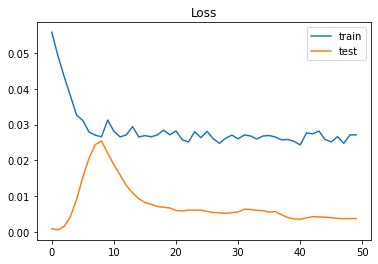

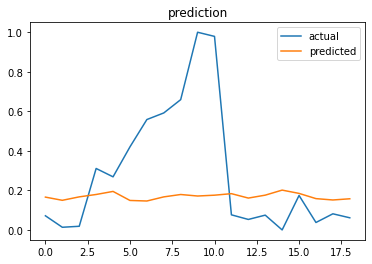

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_60 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_60 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_61 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_61 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 0s 118ms/step - loss: 0

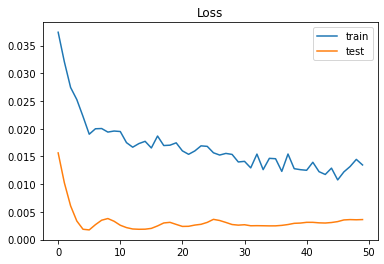

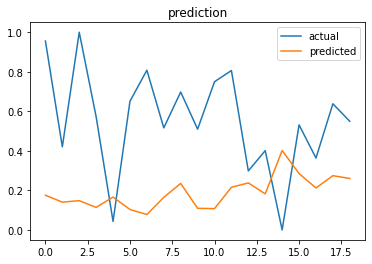

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_62 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_62 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_63 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_63 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 3s 863ms/step - loss: 0

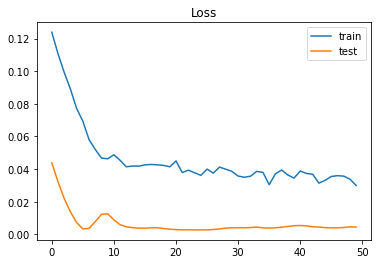

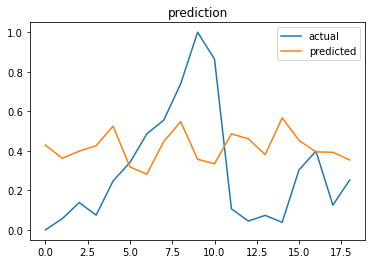

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_64 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_64 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_65 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_65 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 0s 119ms/step - loss: 0

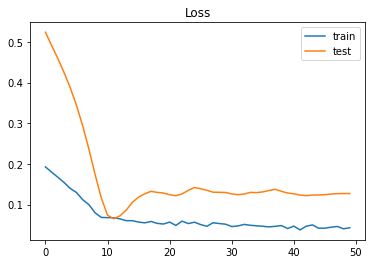

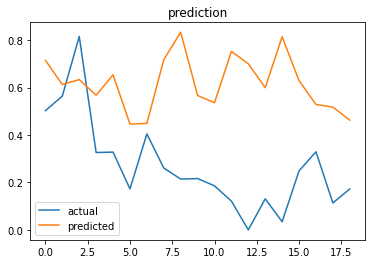

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_66 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_66 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_67 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_67 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 0s 122ms/step - loss: 0

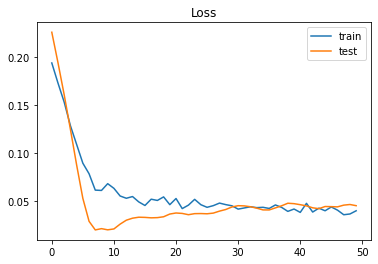

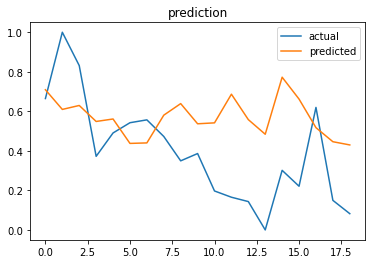

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_68 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_68 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_69 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_69 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 0s 121ms/step - loss: 0

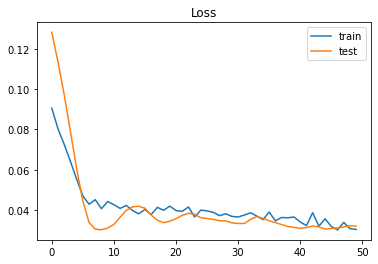

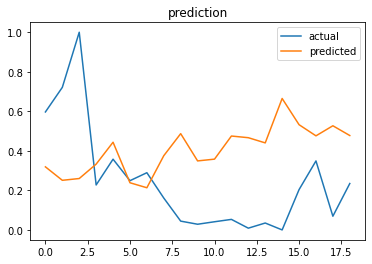

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_70 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_70 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_71 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_71 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 0s 121ms/step - loss: 0

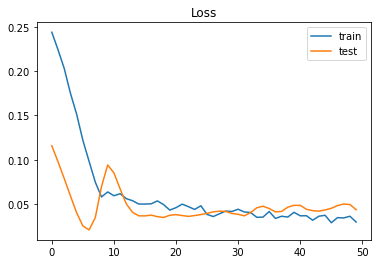

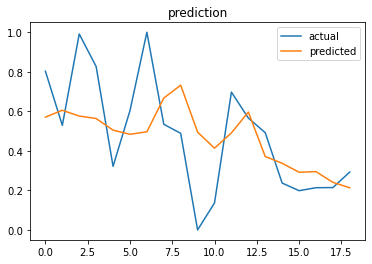

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_72 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_72 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_73 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_73 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 130ms/step - loss: 0

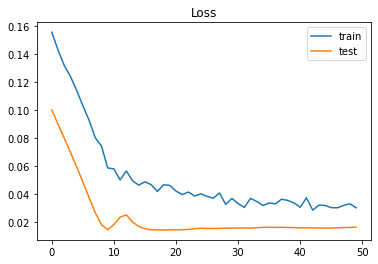

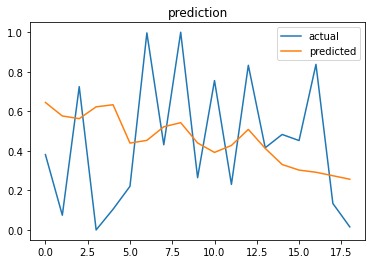

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_74 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_74 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_75 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_75 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 135ms/step - loss: 0

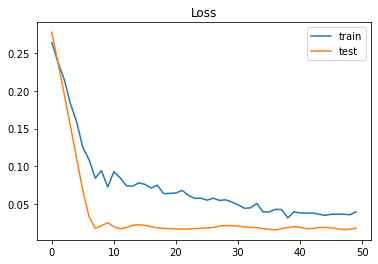

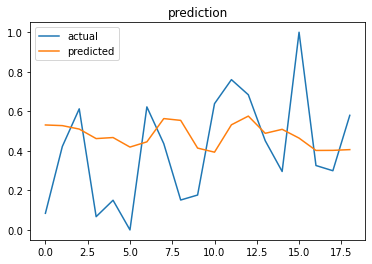

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_76 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_76 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_77 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_77 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 0s 117ms/step - loss: 0

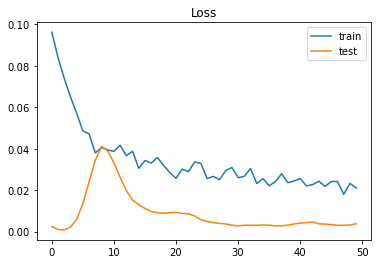

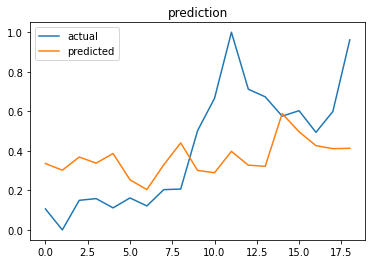

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_78 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_78 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_79 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_79 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 0s 121ms/step - loss: 0

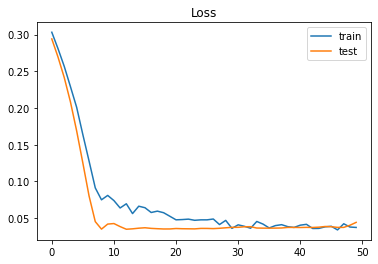

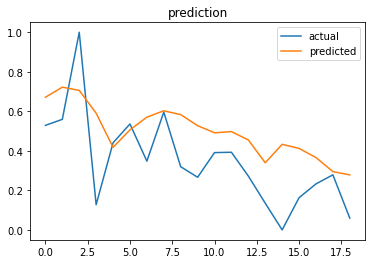

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_80 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_80 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_81 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_81 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 0s 124ms/step - loss: 0

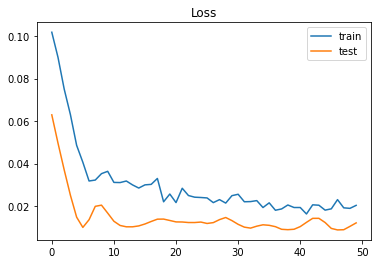

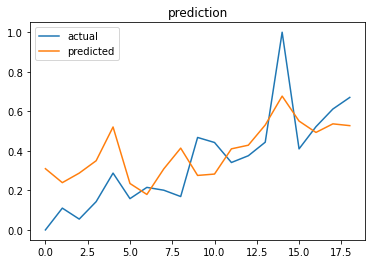

(64, 2, 16) (64, 1)
(3, 2, 16) (3, 1)
Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_82 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_82 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_83 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_83 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2/2 [==============================] - 1s 279ms/step - loss: 0.126

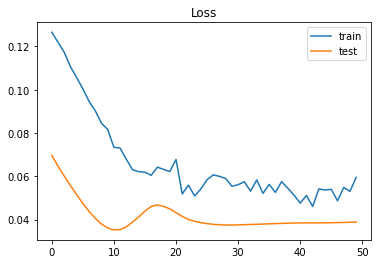

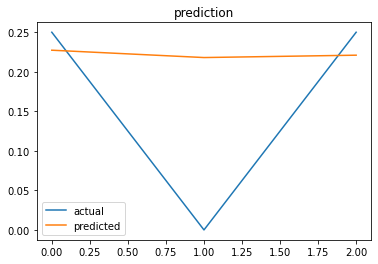

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_84 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_84 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_85 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_85 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 0s 119ms/step - loss: 0

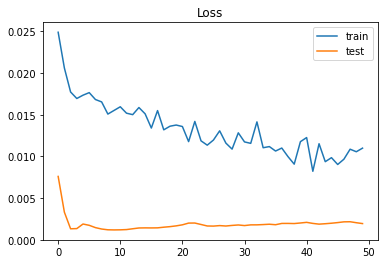

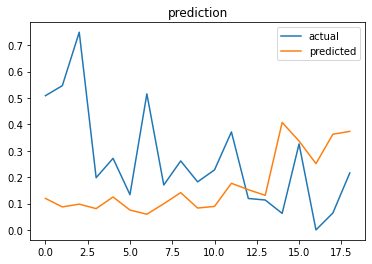

(16, 2, 16) (16, 1)
(2, 2, 16) (2, 1)
Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_86 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_86 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_87 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_87 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1/1 [==============================] - 1s 533ms/step - loss: 0.529

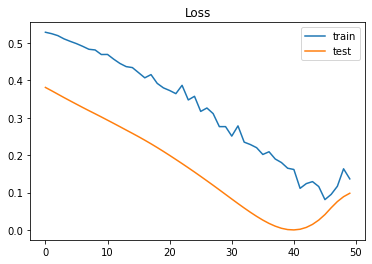

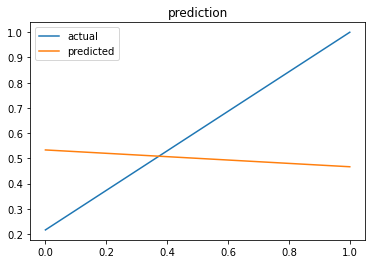

(103, 2, 16) (103, 1)
(18, 2, 16) (18, 1)
Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_88 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_88 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_89 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_89 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
3/3 [==============================] - 0s 160ms/step - loss: 0

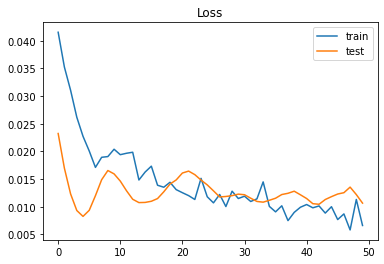

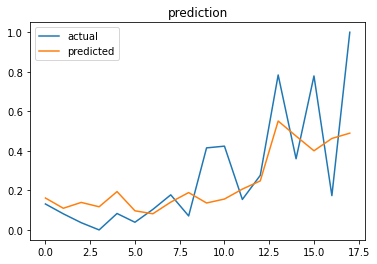

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_90 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_90 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_91 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_91 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 340ms/step - loss: 0

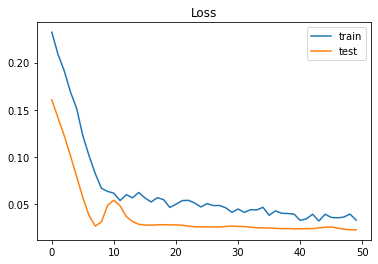

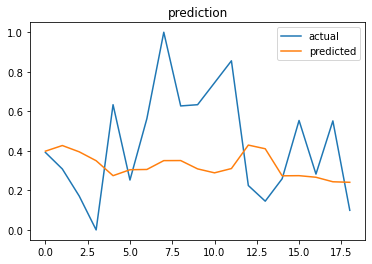

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_92 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_92 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_93 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_93 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 224ms/step - loss: 0

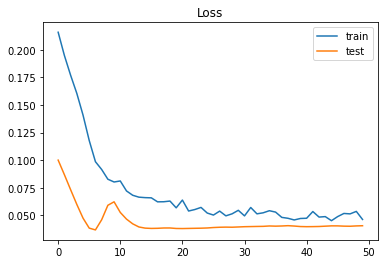

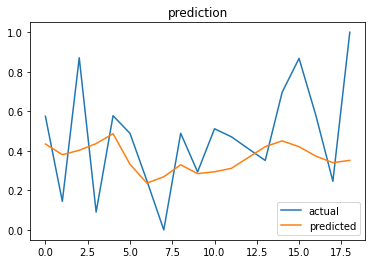

(112, 2, 16) (112, 1)
(17, 2, 16) (17, 1)
Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_94 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_94 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_95 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_95 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 179ms/step - loss: 0

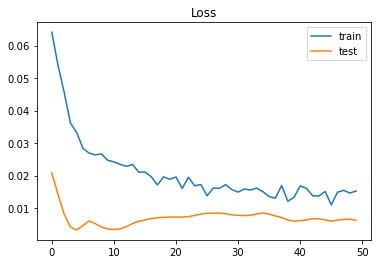

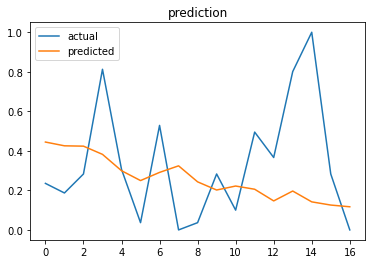

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_96 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_96 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_97 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_97 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 0s 122ms/step - loss: 0

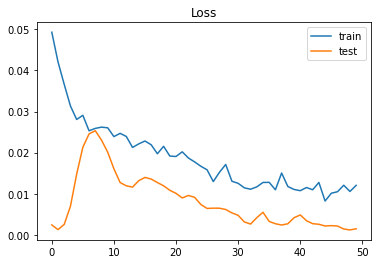

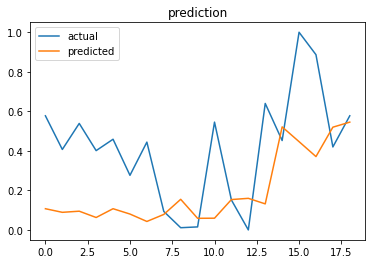

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_98 (LSTM)               (None, 2, 64)             20736     
_________________________________________________________________
dropout_98 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
lstm_99 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_99 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 152ms/step - loss: 0

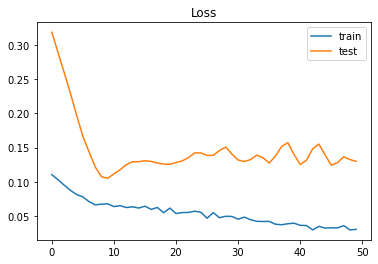

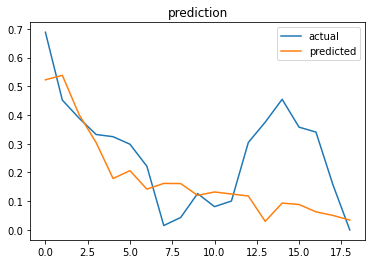

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_100 (LSTM)              (None, 2, 64)             20736     
_________________________________________________________________
dropout_100 (Dropout)        (None, 2, 64)             0         
_________________________________________________________________
lstm_101 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dropout_101 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 0s 119ms/step - loss: 0

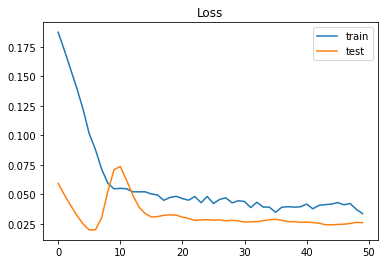

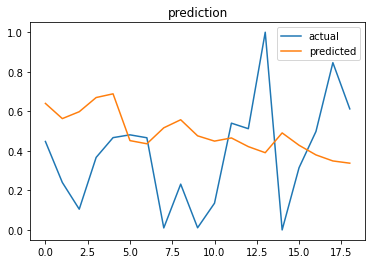

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_102 (LSTM)              (None, 2, 64)             20736     
_________________________________________________________________
dropout_102 (Dropout)        (None, 2, 64)             0         
_________________________________________________________________
lstm_103 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dropout_103 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 132ms/step - loss: 0

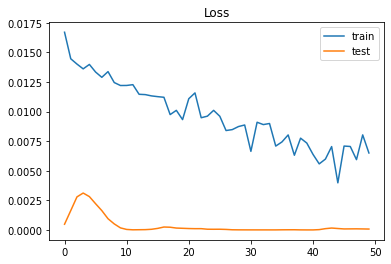

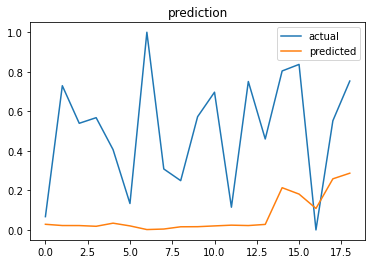

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_104 (LSTM)              (None, 2, 64)             20736     
_________________________________________________________________
dropout_104 (Dropout)        (None, 2, 64)             0         
_________________________________________________________________
lstm_105 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dropout_105 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 209ms/step - loss: 0

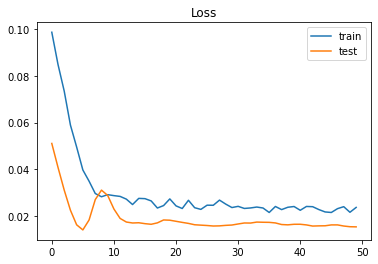

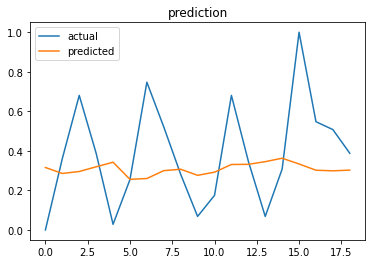

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_106 (LSTM)              (None, 2, 64)             20736     
_________________________________________________________________
dropout_106 (Dropout)        (None, 2, 64)             0         
_________________________________________________________________
lstm_107 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dropout_107 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 164ms/step - loss: 0

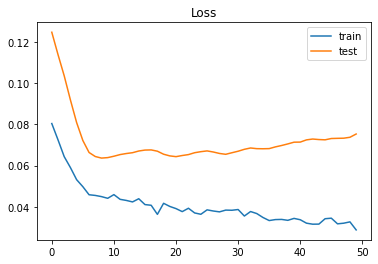

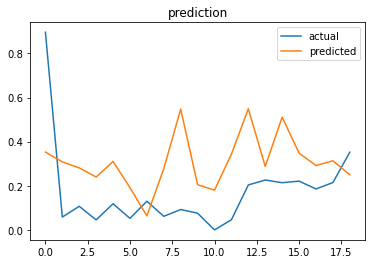

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_108 (LSTM)              (None, 2, 64)             20736     
_________________________________________________________________
dropout_108 (Dropout)        (None, 2, 64)             0         
_________________________________________________________________
lstm_109 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dropout_109 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 126ms/step - loss: 0

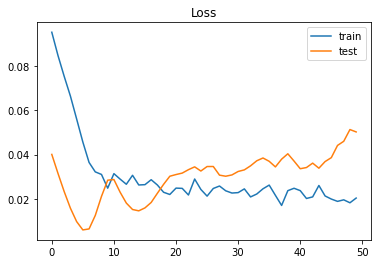

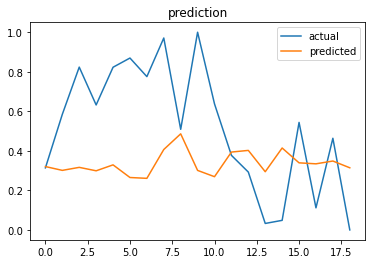

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_110 (LSTM)              (None, 2, 64)             20736     
_________________________________________________________________
dropout_110 (Dropout)        (None, 2, 64)             0         
_________________________________________________________________
lstm_111 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dropout_111 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 135ms/step - loss: 0

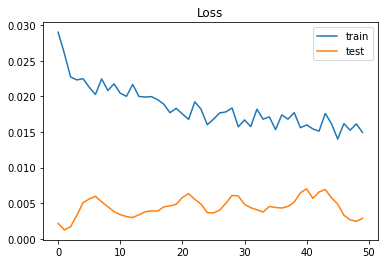

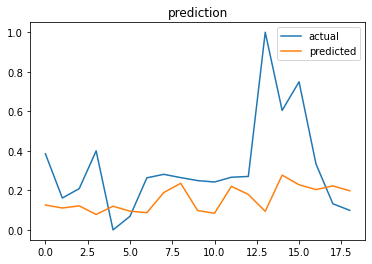

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_112 (LSTM)              (None, 2, 64)             20736     
_________________________________________________________________
dropout_112 (Dropout)        (None, 2, 64)             0         
_________________________________________________________________
lstm_113 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dropout_113 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 153ms/step - loss: 0

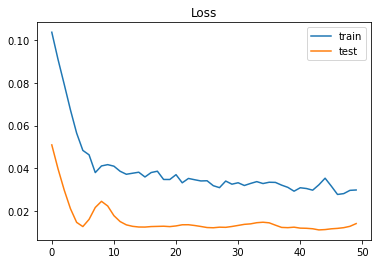

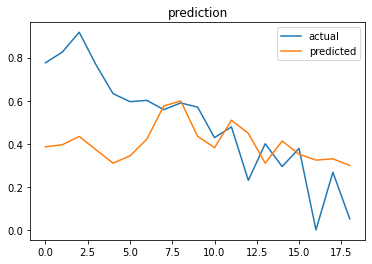

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_114 (LSTM)              (None, 2, 64)             20736     
_________________________________________________________________
dropout_114 (Dropout)        (None, 2, 64)             0         
_________________________________________________________________
lstm_115 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dropout_115 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 135ms/step - loss: 0

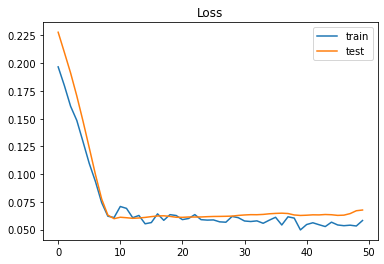

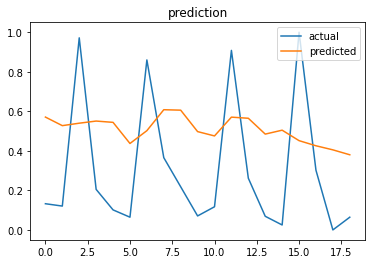

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_116 (LSTM)              (None, 2, 64)             20736     
_________________________________________________________________
dropout_116 (Dropout)        (None, 2, 64)             0         
_________________________________________________________________
lstm_117 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dropout_117 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 159ms/step - loss: 0

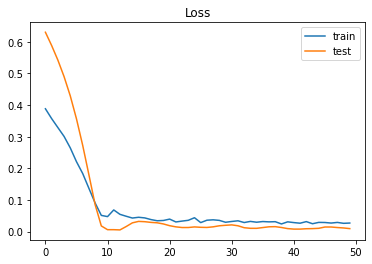

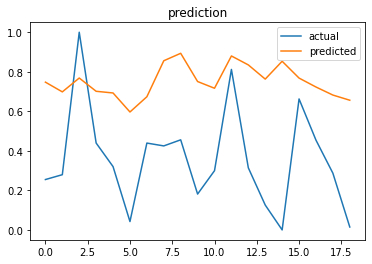

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_118 (LSTM)              (None, 2, 64)             20736     
_________________________________________________________________
dropout_118 (Dropout)        (None, 2, 64)             0         
_________________________________________________________________
lstm_119 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dropout_119 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 135ms/step - loss: 0

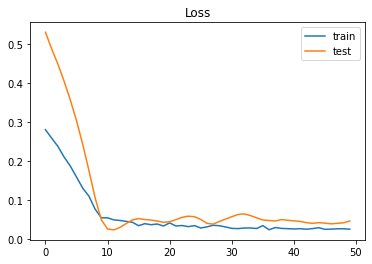

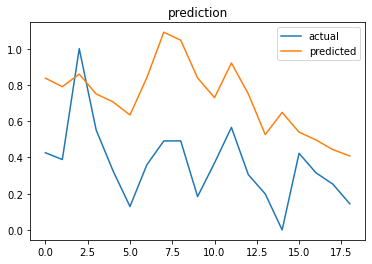

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_120 (LSTM)              (None, 2, 64)             20736     
_________________________________________________________________
dropout_120 (Dropout)        (None, 2, 64)             0         
_________________________________________________________________
lstm_121 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dropout_121 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 151ms/step - loss: 0

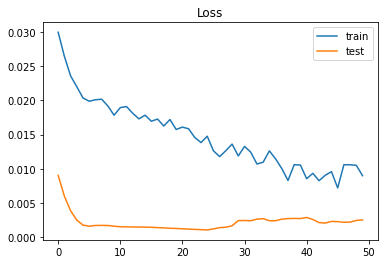

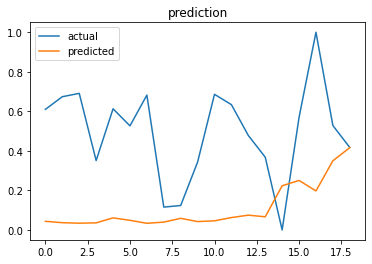

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_122 (LSTM)              (None, 2, 64)             20736     
_________________________________________________________________
dropout_122 (Dropout)        (None, 2, 64)             0         
_________________________________________________________________
lstm_123 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dropout_123 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 0s 120ms/step - loss: 0

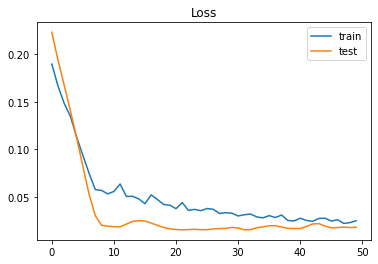

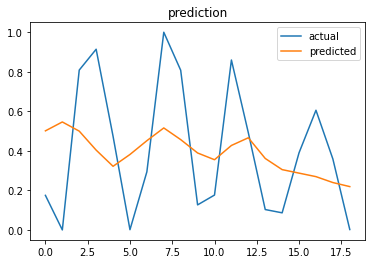

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_124 (LSTM)              (None, 2, 64)             20736     
_________________________________________________________________
dropout_124 (Dropout)        (None, 2, 64)             0         
_________________________________________________________________
lstm_125 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dropout_125 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 163ms/step - loss: 0

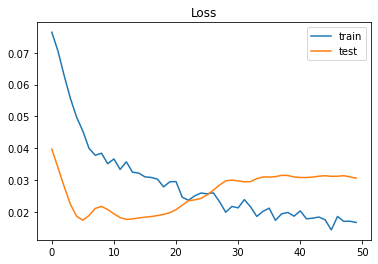

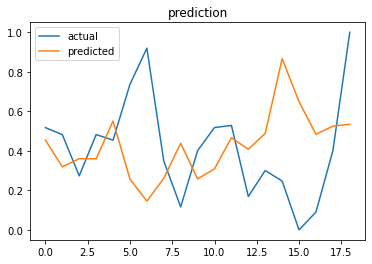

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_126 (LSTM)              (None, 2, 64)             20736     
_________________________________________________________________
dropout_126 (Dropout)        (None, 2, 64)             0         
_________________________________________________________________
lstm_127 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dropout_127 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 138ms/step - loss: 0

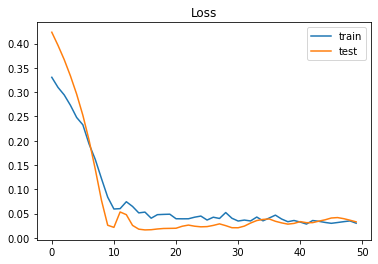

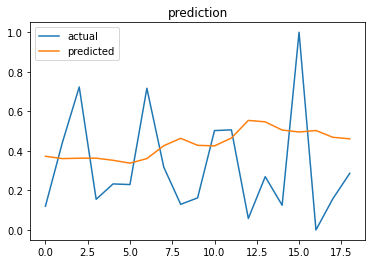

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_128 (LSTM)              (None, 2, 64)             20736     
_________________________________________________________________
dropout_128 (Dropout)        (None, 2, 64)             0         
_________________________________________________________________
lstm_129 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dropout_129 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 212ms/step - loss: 0

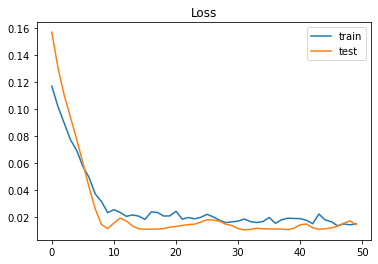

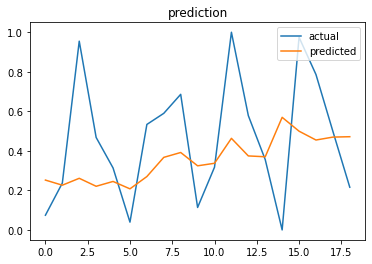

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_130 (LSTM)              (None, 2, 64)             20736     
_________________________________________________________________
dropout_130 (Dropout)        (None, 2, 64)             0         
_________________________________________________________________
lstm_131 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dropout_131 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 145ms/step - loss: 0

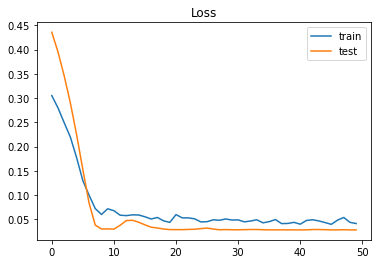

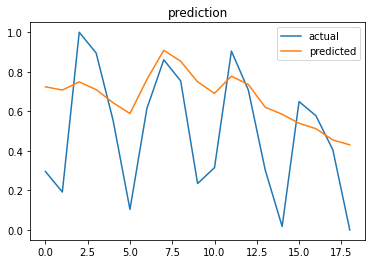

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_132 (LSTM)              (None, 2, 64)             20736     
_________________________________________________________________
dropout_132 (Dropout)        (None, 2, 64)             0         
_________________________________________________________________
lstm_133 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dropout_133 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 167ms/step - loss: 0

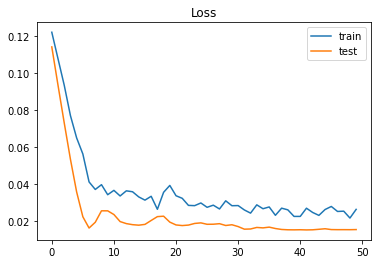

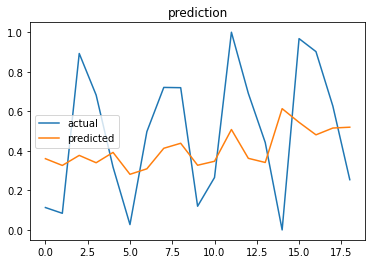

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_134 (LSTM)              (None, 2, 64)             20736     
_________________________________________________________________
dropout_134 (Dropout)        (None, 2, 64)             0         
_________________________________________________________________
lstm_135 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dropout_135 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 136ms/step - loss: 0

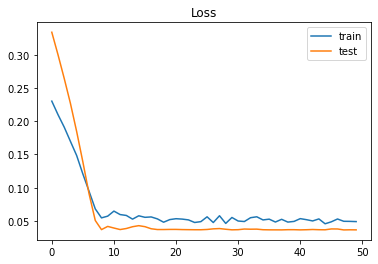

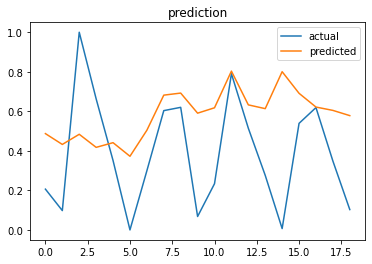

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_136 (LSTM)              (None, 2, 64)             20736     
_________________________________________________________________
dropout_136 (Dropout)        (None, 2, 64)             0         
_________________________________________________________________
lstm_137 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dropout_137 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 159ms/step - loss: 0

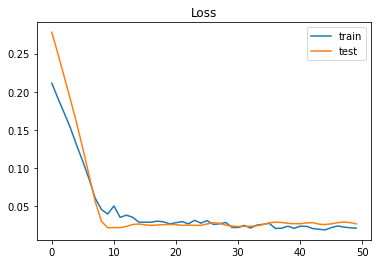

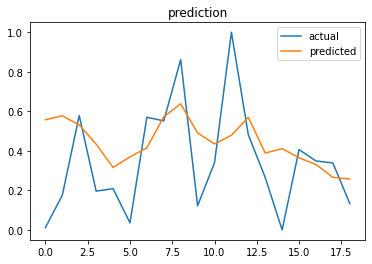

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_138 (LSTM)              (None, 2, 64)             20736     
_________________________________________________________________
dropout_138 (Dropout)        (None, 2, 64)             0         
_________________________________________________________________
lstm_139 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dropout_139 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 148ms/step - loss: 0

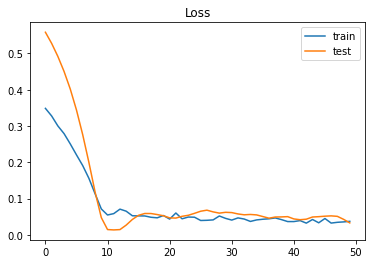

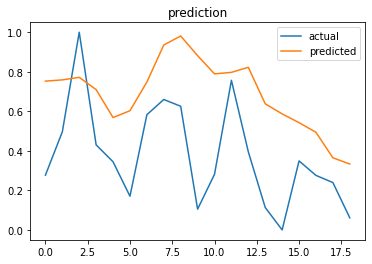

(99, 2, 16) (99, 1)
(19, 2, 16) (19, 1)
Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_140 (LSTM)              (None, 2, 64)             20736     
_________________________________________________________________
dropout_140 (Dropout)        (None, 2, 64)             0         
_________________________________________________________________
lstm_141 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dropout_141 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
3/3 [==============================] - 2s 747ms/step - loss: 0.3

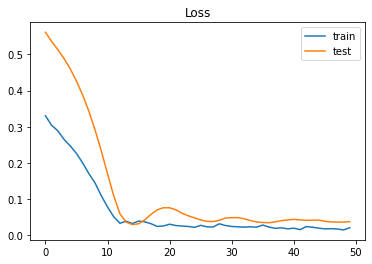

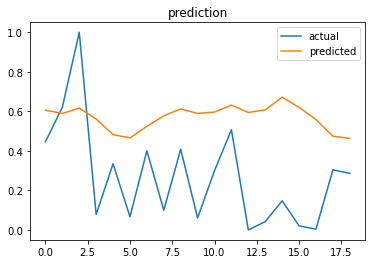

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_142 (LSTM)              (None, 2, 64)             20736     
_________________________________________________________________
dropout_142 (Dropout)        (None, 2, 64)             0         
_________________________________________________________________
lstm_143 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dropout_143 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 219ms/step - loss: 0

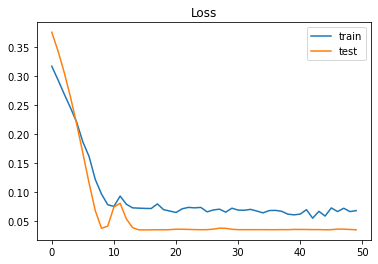

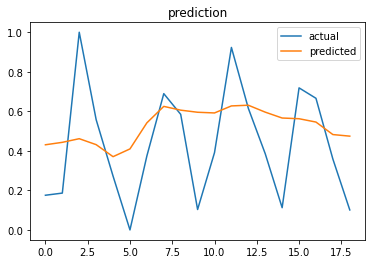

(120, 2, 16) (120, 1)
(19, 2, 16) (19, 1)
Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_144 (LSTM)              (None, 2, 64)             20736     
_________________________________________________________________
dropout_144 (Dropout)        (None, 2, 64)             0         
_________________________________________________________________
lstm_145 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dropout_145 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 1s 173ms/step - loss: 0

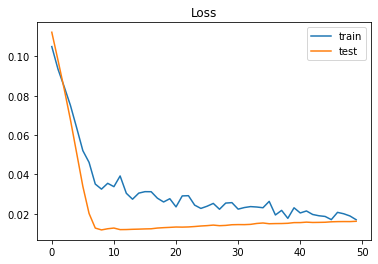

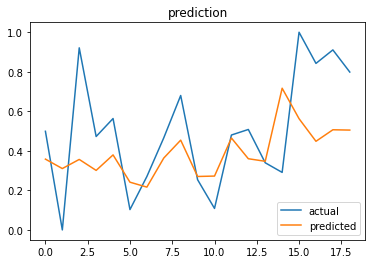

(21, 2, 16) (21, 1)
(12, 2, 16) (12, 1)
Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_146 (LSTM)              (None, 2, 64)             20736     
_________________________________________________________________
dropout_146 (Dropout)        (None, 2, 64)             0         
_________________________________________________________________
lstm_147 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dropout_147 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1/1 [==============================] - 0s 476ms/step - loss: 0.1

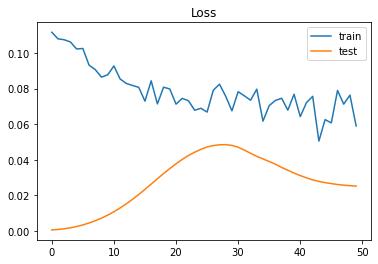

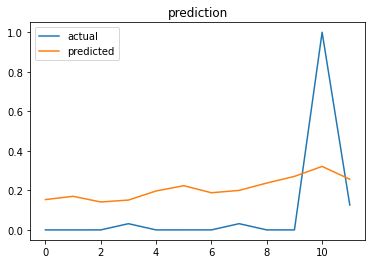

In [5]:
#process transformation, modelling and fitting in a loop for every department

n_future =1
n_past =2
models_list = []
scaler_list = []
val_pred_list = []
history_list = []
for j in dept_set:
    #pull the data for dept i in store 1
    train_i = train_1[(train_1['Dept']==j)]
    val_i = val_1[(val_1['Dept']==j)]
    test_i=test_1[(test_1['Dept']==j)]

    # normalize the dataset
    scaler = MinMaxScaler().fit(train_set)
    scaled_train_i = scaler.fit_transform(train_i)
    scaled_val_i = scaler.fit_transform(val_i)

    #Reformat train data into a shape: (n_samples x timesteps x n_features)
    train_i_x =[]
    train_i_y = []

    for i in range(n_past, len(scaled_train_i) - n_future+1):
        train_i_x.append(scaled_train_i[i-n_past:i, 0:scaled_train_i.shape[1]-1])
        train_i_y.append(scaled_train_i[i+n_future-1:i+n_future,scaled_train_i.shape[1]-1])
    

    train_i_x, train_i_y = np.array(train_i_x), np.array(train_i_y)
    print(train_i_x.shape, train_i_y.shape)

    #Reformat validation data into a shape: (n_samples x timesteps x n_features)
    val_i_x =[] 
    val_i_y = []

    for i in range(n_past, len(scaled_val_i) - n_future+1):
        val_i_x.append(scaled_val_i[i-n_past:i, 0:scaled_val_i.shape[1]-1]) 
        val_i_y.append(scaled_val_i[i+n_future-1:i+n_future, scaled_val_i.shape[1]-1])
    

    val_i_x, val_i_y = np.array(val_i_x), np.array(val_i_y)
    print(val_i_x.shape, val_i_y.shape)

    # define the model 
    lstm_model = keras.Sequential()
    lstm_model.add(LSTM(64, activation='relu',input_shape=(train_i_x.shape[1],train_i_x.shape[2]), return_sequences=True))
    lstm_model.add(Dropout(0.4))
    lstm_model.add(LSTM(32, activation='relu', return_sequences=False))
    lstm_model.add(Dropout(0.3))
    lstm_model.add(Dense(train_i_y.shape[1]))
    lstm_model.compile(optimizer='adam', loss='mse',metrics=['mse',"mean_absolute_percentage_error"])
    lstm_model.summary()
    
    # fit the model
    history_i =lstm_model.fit(train_i_x, train_i_y,validation_split=0.1, epochs=50, verbose=1)

    train_loss = lstm_model.evaluate(train_i_x, train_i_y, verbose=1)

    # plot loss during training
    plt.title('Loss')
    plt.plot(history_i.history['loss'], label='train')
    plt.plot(history_i.history['val_loss'], label='test')
    plt.legend()
    plt.show()

    y_val_pred = lstm_model.predict(val_i_x)

    plt.title('prediction')
    plt.plot(val_i_y, label='actual')
    plt.plot(y_val_pred, label='predicted')
    plt.legend()
    plt.show()


    models_list.append(lstm_model)
    history_list.append(history_i)
    val_pred_list.append(y_val_pred)
    scaler_list.append(scaler)

In [8]:
y_pred_dept=pd.DataFrame()
y_pred_dept['Date']=val_1[n_past:len(val_1)].Date
y_pred_dept['Dept']=val_1[n_past:len(val_1)].Dept
y_pred_dept['Weekly_Sales']=val_1[n_past:len(val_1)].Weekly_Sales
y_pred_dept.reset_index(drop=True, inplace=True)
y_pred_dept['Prediction']=0
y_pred_dept

Date  Dept  Weekly_Sales  Prediction
0     2012-06-22     1      16633.41           0
1     2012-06-29     1      15722.82           0
2     2012-07-06     1      17823.37           0
3     2012-07-13     1      16566.18           0
4     2012-07-20     1      16348.06           0
...          ...   ...           ...         ...
1496  2012-08-31    99         20.06           0
1497  2012-09-07    99          0.05           0
1498  2012-09-14    99          0.03           0
1499  2012-10-05    99        635.00           0
1500  2012-10-12    99         80.00           0

[1501 rows x 4 columns]

In [18]:
list_1=[]
n=0
dept_set
dept_set_1 = list(dept_set)

for i in dept_set:
    # inverse transform the dataset to operate on the original values size
    scaled_val_set_1 = scaler_list[dept_set_1.index(i)].transform(val_1[(val_1['Dept']==i)])
    scaled_val_set_2= scaler_list[dept_set_1.index(i)].inverse_transform(scaled_val_set_1)
    scaled_val_set_1[:len(val_pred_list[dept_set_1.index(i)]),-1]=val_pred_list[dept_set_1.index(i)].T
    val_set_i= scaler.inverse_transform(scaled_val_set_1[:len(val_pred_list[dept_set_1.index(i)]),:])[:,-1]
    n=len(val_pred_list[dept_set_1.index(i)])
    #print(val_set_i.shape)
    for value in val_set_i:
        list_1.append(value)
    if i < 99:
        for j in range(2):
            list_1.append(0)
    
    
len(list_1)


1501

In [20]:
#save calculated and original sales in one table
y_pred_dept['Prediction']=list_1
y_pred_dept.to_csv('prediction_dept_1.csv', sep=',' , index= True)
y_pred_dept

Date  Dept  Weekly_Sales  Prediction
0     2012-06-22     1      16633.41  259.885272
1     2012-06-29     1      15722.82  193.094245
2     2012-07-06     1      17823.37  201.455931
3     2012-07-13     1      16566.18  173.586428
4     2012-07-20     1      16348.06  303.506976
...          ...   ...           ...         ...
1496  2012-08-31    99         20.06  126.942799
1497  2012-09-07    99          0.05  150.566927
1498  2012-09-14    99          0.03  171.949809
1499  2012-10-05    99        635.00  203.933957
1500  2012-10-12    99         80.00  162.767968

[1501 rows x 4 columns]